## Problem 1

### Part 1

Restricted Boltzmann is an undirected graph model. It is based on the probability function which is dependent on the energy function. Lets assume that it has a layer v which is a visible layer and a hidden layer called h.

Joint Probability distribution specified by its energy function:<br>

<font size="4">$ P(v, h) = \frac{1}{Z}exp (-E(v, h)) $<br></font>

Where, the energy function is given by:<br>

<font size="4">$ E(v, h) = -b^T v - c^T h - v^T Wh$</font>

Now, we can define the partition function Z as:

<font size="4">$ Z = \sum_v \sum_h exp\{-E(v, h)\} $</font>

We ultimately want to increase our probability and that also means that we need to reduce our energy. Smaller the value returned by our energy function, larger will be the probability and hence more certainty.

Deriving the conditional distributions from the joint distribution:

<font size="4">$ P(h | v) = \frac{P(h, v)}{P(v)} $</font>

<font size="4">$ = \frac{1}{P(v)} \frac{1}{Z} exp\{b^T v + c^T h + v^T Wh\} = \frac{1}{Z'} exp\{c^T h + v^T Wh\} $</font>

<font size="4">$ = \frac{1}{Z'} exp \left\{ \sum_{j=1}^{n_h} c_j h_j + \sum_{j=1}^{n_h} v^T W_j h_j \right\} $</font>

<font size="4">$ = \frac{1}{Z'} \prod_{j=1}^{n_h} exp\{c_j h_j + v^T W_j h_j\}$</font>

### Part 2

#### Importing, pre-processing and visualizing the MNIST dataset

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

import random
random.seed(10)

from keras.models import Model, Sequential
from keras.losses import mse, binary_crossentropy
from keras import backend as B

from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [247]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

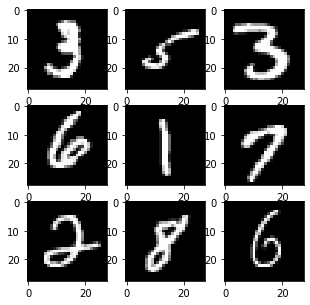

In [248]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i+10], cmap="gray")
plt.show()

In [249]:
np.array(x_train).shape
x_ = np.asarray(x_train)/np.max(x_train)
x = np.array(x_).reshape(x_.shape[0], x_.shape[1]*x_.shape[2])
x.shape

(60000, 784)

In [250]:
values = np.array(y_train)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Q1.B.a. 20 Hidden nodes

In [129]:
rbm = BernoulliRBM(n_components=20, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(x)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -198.55, time = 2.12s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -190.68, time = 2.53s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -183.28, time = 2.59s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -171.78, time = 2.55s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -166.17, time = 2.53s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -166.27, time = 2.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -159.27, time = 2.60s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -156.66, time = 2.58s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -149.52, time = 2.53s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -146.76, time = 2.52s


BernoulliRBM(learning_rate=0.01, n_components=20, random_state=0, verbose=True)

In [130]:
_x_ = x[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

In [131]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

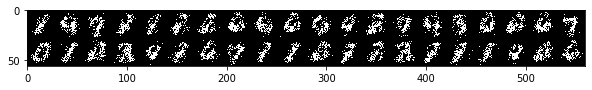

In [132]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

### Q1.B.b. 100 Hidden nodes

In [133]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(x)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.67, time = 14.21s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.63, time = 14.81s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -93.17, time = 15.94s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.19, time = 17.66s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.75, time = 18.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.75, time = 18.68s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.46, time = 18.59s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.05, time = 18.19s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.85, time = 17.86s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.65, time = 18.24s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [134]:
_x_ = x[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

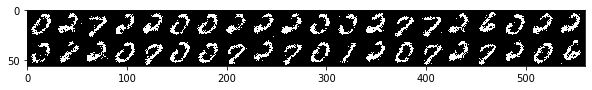

In [135]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

### Q1.B.c. 500 Hidden nodes

In [136]:
rbm = BernoulliRBM(n_components=500, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(x)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -88.83, time = 47.42s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -77.90, time = 49.53s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -72.94, time = 49.65s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -69.43, time = 49.38s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -69.31, time = 49.36s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -67.23, time = 49.44s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -68.50, time = 50.91s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -67.36, time = 49.29s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -65.92, time = 49.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -65.87, time = 49.61s


BernoulliRBM(learning_rate=0.01, n_components=500, random_state=0, verbose=True)

In [137]:
_x_ = x[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

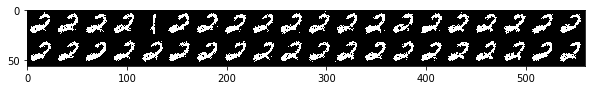

In [138]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

In [251]:
np.array(x_test).shape
x_t = np.asarray(x_test)/np.max(x_test)
xt = np.array(x_t).reshape(x_t.shape[0], x_t.shape[1]*x_t.shape[2])
xt.shape

(10000, 784)

### Q1.C.a. 20% Pixels removed

In [140]:
xtt = xt
remove_percent = 20
pixels_to_remove = 784*remove_percent//100
temp = []
for i in range(pixels_to_remove):
    temp.append(random.randrange(783))
for i in temp:
    xtt[i] = 0

In [141]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(xtt)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -168.86, time = 2.97s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -143.26, time = 3.21s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -129.69, time = 3.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -119.71, time = 3.28s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -114.72, time = 3.20s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -109.71, time = 3.20s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -106.88, time = 3.31s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -104.12, time = 3.27s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -100.86, time = 3.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -98.44, time = 3.02s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [142]:
_x_ = xtt[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

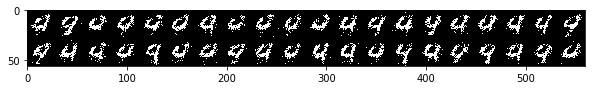

In [143]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

### Q1.C.a. 50% Pixels removed

In [144]:
xtt = xt
remove_percent = 50
pixels_to_remove = 784*remove_percent//100
temp = []
for i in range(pixels_to_remove):
    temp.append(random.randrange(783))
for i in temp:
    xtt[i] = 0

In [145]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(xtt)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -169.27, time = 3.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -141.33, time = 3.19s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -127.98, time = 3.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -119.62, time = 3.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -114.37, time = 3.30s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -109.81, time = 3.27s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -106.87, time = 3.17s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -103.37, time = 3.21s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -101.02, time = 3.08s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -98.82, time = 3.10s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [146]:
_x_ = xtt[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

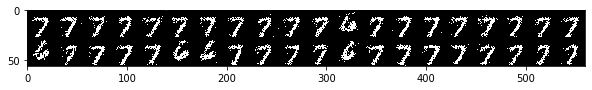

In [147]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

### Q1.C.a. 80% Pixels removed

In [148]:
xtt = xt
remove_percent = 80
pixels_to_remove = 784*remove_percent//100
temp = []
for i in range(pixels_to_remove):
    temp.append(random.randrange(783))
for i in temp:
    xtt[i] = 0

In [149]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(xtt)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -167.07, time = 3.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -140.87, time = 3.17s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -126.85, time = 3.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -118.99, time = 3.14s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -113.74, time = 3.28s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -107.43, time = 3.26s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -104.68, time = 3.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -101.59, time = 3.31s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -99.95, time = 3.29s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -97.06, time = 3.14s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [150]:
_x_ = xtt[:40].copy()
for i in range(1000):
    for j in range(40):
        _x_[j] = rbm.gibbs(_x_[j])

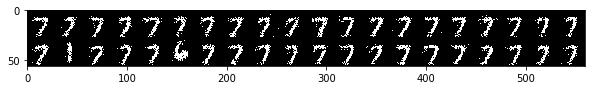

In [151]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(_x_), cmap="gray")

## Problem 2

In [355]:
def temp(args):
    z_mean, z_logvar = args
    first, second = B.shape(z_mean)[0], B.int_shape(z_mean)[1]
    batch, dimension = first, second
    ret = B.random_normal(shape=(batch, dimension))
    return z_mean + B.exp(0.5 * z_logvar) * ret

In [375]:
def create_vae(latent_node):
    encoder_input = keras.layers.Input(shape=784, name='input_encoder')
    encoder_hidden_1 = keras.layers.Dense(256, activation='relu')(encoder_input)
    encoder_hidden_2 = keras.layers.Dense(512, activation='relu')(encoder_hidden_1)

    z_mean = keras.layers.Dense(latent_node, name='z_mean')(encoder_hidden_2)
    z_logvar = keras.layers.Dense(latent_node, name='z_log_var')(encoder_hidden_2)
    z = keras.layers.Lambda(temp, output_shape=(latent_node,), name='z')([z_mean, z_logvar])

    encoder = Model(encoder_input, [z_mean, z_logvar, z], name='encoder')
    
    latent_encoder_inputs = keras.layers.Input(shape=(latent_node,), name='latent_sampling')
    decoder_hidden_1 = keras.layers.Dense(512, activation='relu')(latent_encoder_inputs)
    decoder_hidden_2 = keras.layers.Dense(256, activation='relu')(decoder_hidden_1)
    decoder_output = keras.layers.Dense(784, activation='sigmoid')(decoder_hidden_2)

    decoder = Model(latent_encoder_inputs, decoder_output, name='decoder')
    
    model_output = decoder(encoder(encoder_input)[2])
    vae = Model(encoder_input, model_output, name='vae')
    
    recon_loss = binary_crossentropy(encoder_input, model_output)
    recon_loss *= 784
    loss = 1 + z_logvar - K.square(z_mean) - K.exp(z_logvar)
    loss = K.sum(loss, axis=-1)
    loss *= -0.5
    vae_loss = K.mean(recon_loss + loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    
#     encoder.summary()
#     decoder.summary()
    
    return vae, encoder, decoder

In [376]:
def train_model(model):
    trained_model = model.fit(x, epochs=epochs, batch_size=128)
    return trained_model 

In [379]:
def plottter(decoder,latent_dim):
    figure = np.zeros((28 * 20, 28 * 20))
    x_axis = np.linspace(-3, 3, 20)
    y_axis = np.linspace(-3, 3, 20)[::-1]    
    for i, yi in enumerate(y_axis):
        for j, xi in enumerate(x_axis):
            if(latent_dim == 2):
                latent_sample = np.array([[xi, yi]*int(latent_dim/2)])
            else:
                latent_sample = np.random.normal(0,1,size=[128, latent_dim])
            input_decoded = decoder.predict(latent_sample)
            digit = input_decoded[0].reshape(28, 28)
            figure[i * 28: (i + 1) * 28,
                   j * 28: (j + 1) * 28] = digit
    
    plt.figure(figsize=(10, 10))
    i_range = 28 // 2
    j_range = (20 - 1) * 28 + i_range + 1
    pixel_range = np.arange(i_range, j_range, 28)
    sample_range_x = np.round(x_axis, 1)
    sample_range_y = np.round(y_axis, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.imshow(figure, cmap='ocean')
    plt.show()

### Q.2.B.a. 2 code units

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 193.1560
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 166.3912
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 159.7172
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 156.0257
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 153.4873
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 151.5339
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 149.7978
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 148.4960
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 147.4527
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 146.5500


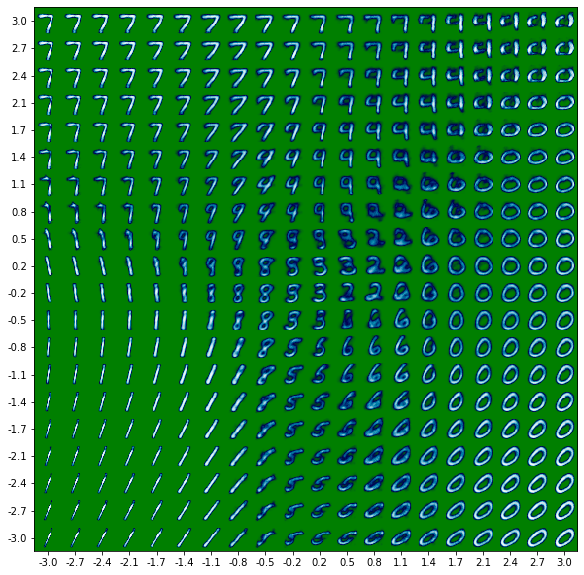

In [385]:
epochs, latent = 10, 2
vae, encoder, decoder = create_vae(latent)
trained_model = train_model(vae)
plottter(decoder, latent)

### Q.2.B.a. 8 code units

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 173.1274
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 129.0042
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 121.5722
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 117.9228
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 115.3966
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 113.6371
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 112.4025
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 111.2707
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 110.4867
Epoch 10/10
469/469 [==============================] - 4s 10ms/step - loss: 109.7260


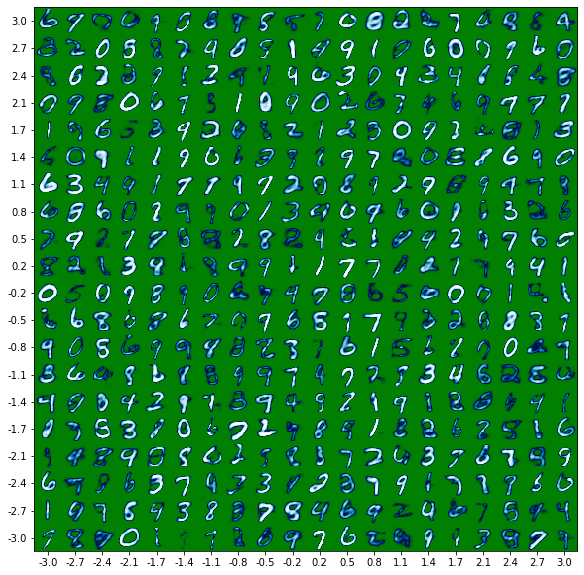

In [383]:
epochs, latent = 10, 8
vae, encoder, decoder = create_vae(latent)
trained_model = train_model(vae)
plottter(decoder, latent)

### Q.2.B.a. 16 code units

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 171.5231
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 125.1349
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 116.4713
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 112.5662
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 110.1321
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 108.2537
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 106.9514
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 105.8933
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 105.0858
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 104.3953


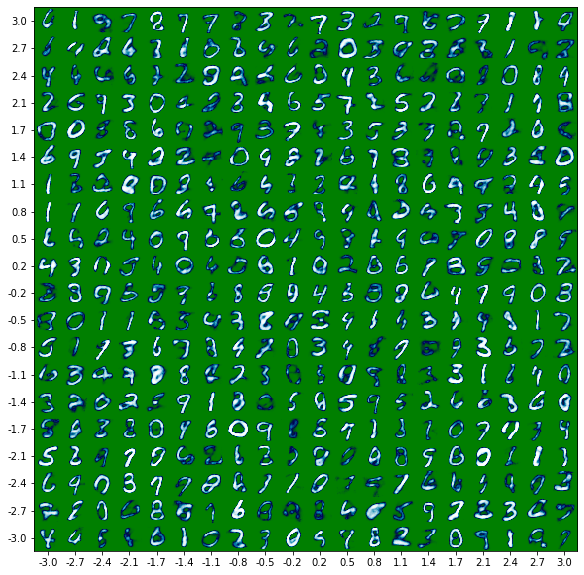

In [384]:
epochs, latent = 10, 16
vae, encoder, decoder = create_vae(latent)
trained_model = train_model(vae)
plottter(decoder, latent)

# references:
- https://www.kaggle.com/
- https://www.deeplearningbook.org/contents/generative_models.html
- https://ublearns.buffalo.edu/bbcswebdav/pid-6840919-dt-content-rid-67762596_1/courses/2221_17920_PsC/Neural-Networks.html#(90)
- Pattern Classification
- https://medium.com/
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
- https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
- https://stackoverflow.com/questions/